<a href="https://colab.research.google.com/github/SwapnilBhandarkar/Time-Series-Analysis/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Generate dates
num_records = 1000
dates = pd.date_range(start="2022-01-01", periods=num_records, freq="D")

# Generate temperature data (seasonal pattern + noise)
np.random.seed(42)
base_temp = 25
seasonal_variation = 10 * np.sin(2 * np.pi * dates.dayofyear / 365)
random_noise = np.random.normal(0, 2, num_records)

temperature = base_temp + seasonal_variation + random_noise

# Create DataFrame
df = pd.DataFrame({
    "date": dates,
    "temperature": temperature.round(2)
})

# Save to CSV
df.to_csv("temperature_data.csv", index=False)

print("Dataset generated successfully!")


Dataset generated successfully!


In [3]:
df.head(50)

,date,temperature
0,2022-01-01,26.17
1,2022-01-02,25.07
2,2022-01-03,26.81
3,2022-01-04,28.73
4,2022-01-05,25.39
5,2022-01-06,25.56
6,2022-01-07,29.36
7,2022-01-08,27.91
8,2022-01-09,25.60
9,2022-01-10,27.80


# **Exploratory Analysis **





In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("temperature_data.csv")
df['date'] = pd.to_datetime(df['date'])


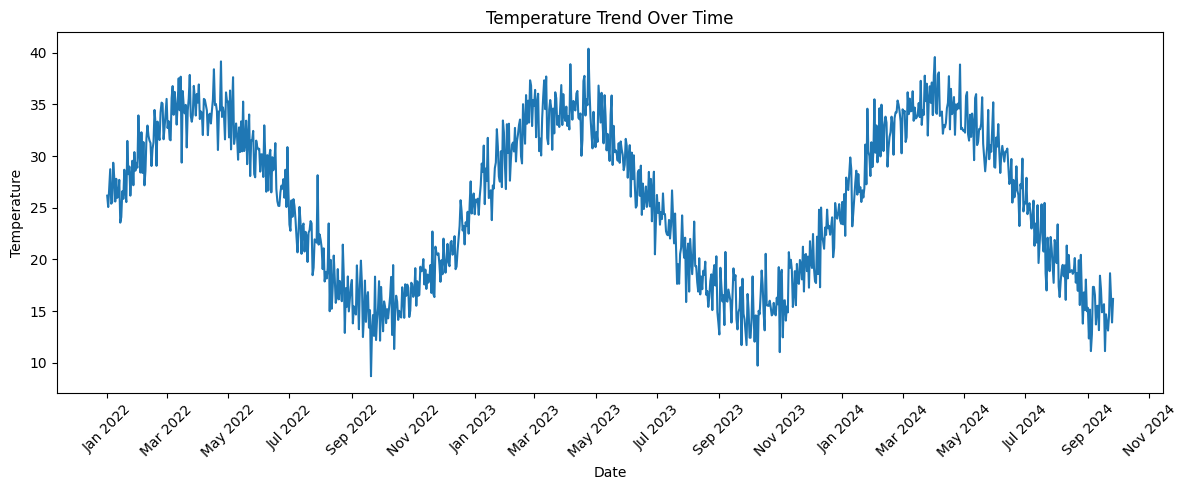

In [14]:
# plt.figure()
# plt.plot(df['date'], df['temperature'])
# plt.xlabel("Date")
# plt.ylabel("Temperature")
# plt.title("Temperature Trend Over Time")
# plt.show()


import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12,5))
plt.plot(df['date'], df['temperature'])
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Trend Over Time")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



5️⃣ Monthly Seasonality Plot
📌 Purpose:

Seasonal pattern (summer vs winter)

Important for ARIMA / SARIMA

**Seasonal (Monthly) Plot**

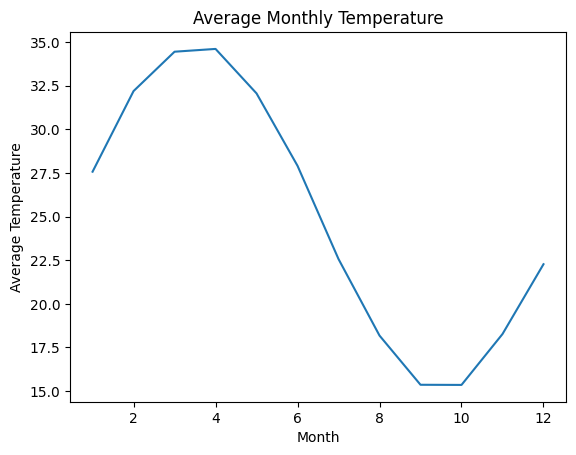

In [6]:
df['month'] = df['date'].dt.month

plt.figure()
df.groupby('month')['temperature'].mean().plot()
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.title("Average Monthly Temperature")
plt.show()


**Histrogram plot**

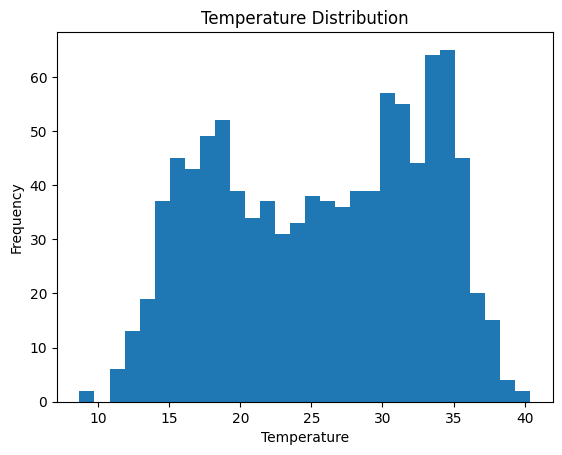

In [7]:
plt.figure()
plt.hist(df['temperature'], bins=30)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")
plt.show()


**box plot**

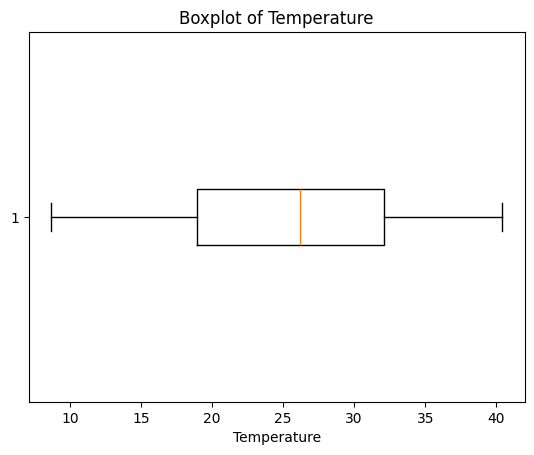

In [8]:
plt.figure()
plt.boxplot(df['temperature'], vert=False)
plt.xlabel("Temperature")
plt.title("Boxplot of Temperature")
plt.show()


**Rolling Mean / Moving Average**

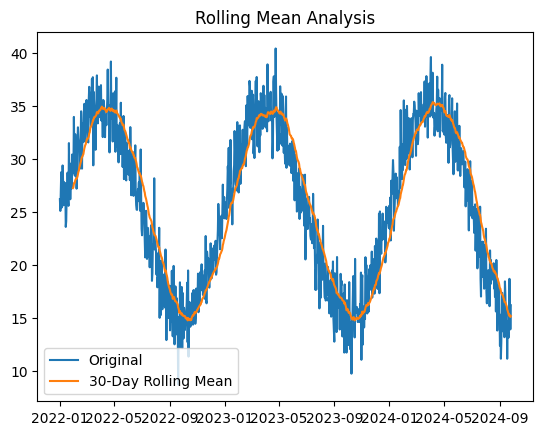

In [9]:
df['rolling_mean'] = df['temperature'].rolling(30).mean()

plt.figure()
plt.plot(df['date'], df['temperature'], label='Original')
plt.plot(df['date'], df['rolling_mean'], label='30-Day Rolling Mean')
plt.legend()
plt.title("Rolling Mean Analysis")
plt.show()


**Lag Plot (Predictive Justification)**

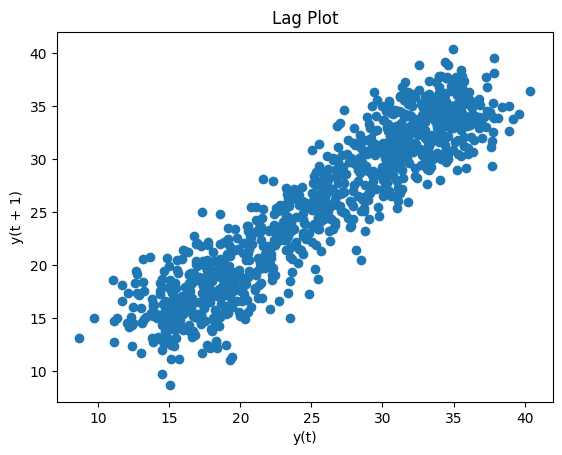

In [11]:
from pandas.plotting import lag_plot
plt.figure()
lag_plot(df['temperature'], lag=1)
plt.title("Lag Plot")
plt.show()
